## 1. Business Overview 
This project aims to analyze a retail dataset to uncover insights into customer purchasing behavior, sales trends, 
and product preferences. The dataset comprises essential attributes such as transaction details, customer 
demographics, product categories, and sales figures.

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\adity\Downloads\retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [3]:
df.isnull()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [14]:
df.dtypes


Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [15]:
df["Date"]=pd.to_datetime(df["Date"])


In [16]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [17]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [21]:
df["Month"]=df.Date.apply(lambda x:x.month)
df["year"]=df.Date.apply(lambda x:x.year)


df["season"]=df["Month"].apply(lambda x:"winter" if x in [11,12,1,2] else "summer" if x in [3,4,5,6] else "Monsoon")

In [22]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,year,season
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,winter
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,winter
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,winter
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,summer
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5,2023,summer
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,11,2023,winter
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,10,2023,Monsoon
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,12,2023,winter


 ## Demographic Influence on Purchasing Behavior

* Analyze the relationship between age, gender, and spending behavior.
* Compare average spending across different age groups and gender.

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\1621653815.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x=pd.cut(df.Age,bins=[18,36,54,64],labels=["18-36","37-54","55-64"]),y="Total Amount",hue="Gender",


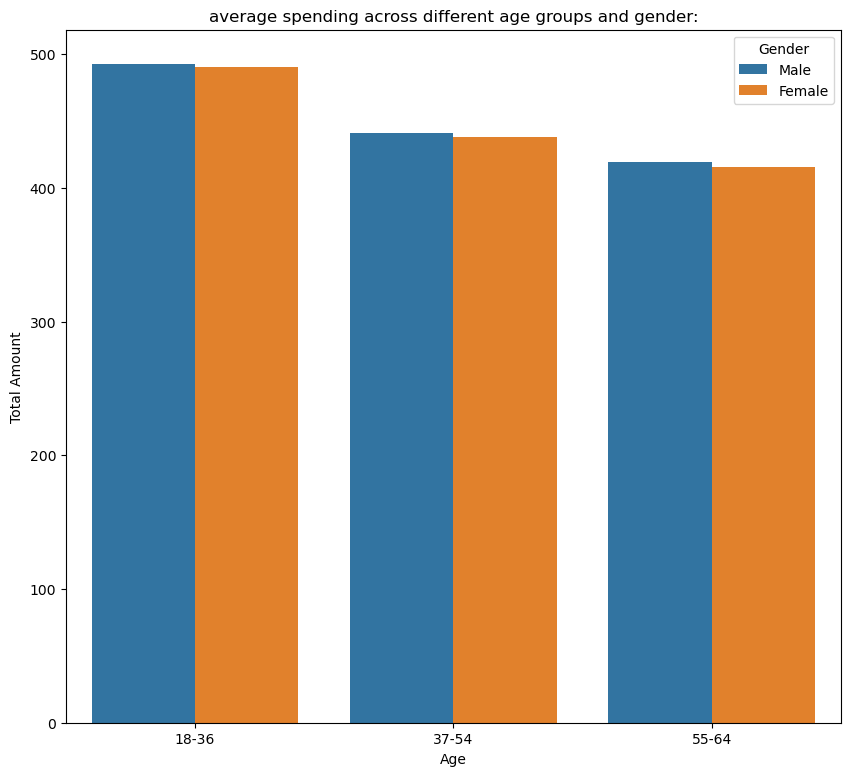

In [29]:
plt.figure(figsize=(10,9))
sns.barplot(data=df,x=pd.cut(df.Age,bins=[18,36,54,64],labels=["18-36","37-54","55-64"]),y="Total Amount",hue="Gender",
                ci=False,estimator="mean")
plt.title("average spending across different age groups and gender:")
plt.show()

## Sales Patterns Across Time Periods
* Identify trends in sales over different months, seasons, and years.
* Detect peak and low sales periods.

In [40]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'year', 'season'],
      dtype='object')

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\3532458476.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df,x="Month",y="Total Amount",ci=False)
C:\Users\adity\AppData\Local\Temp\ipykernel_18320\3532458476.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df,x="season",y="Total Amount",ci=False)
C:\Users\adity\AppData\Local\Temp\ipykernel_18320\3532458476.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df,x="year",y="Total Amount",ci=False)


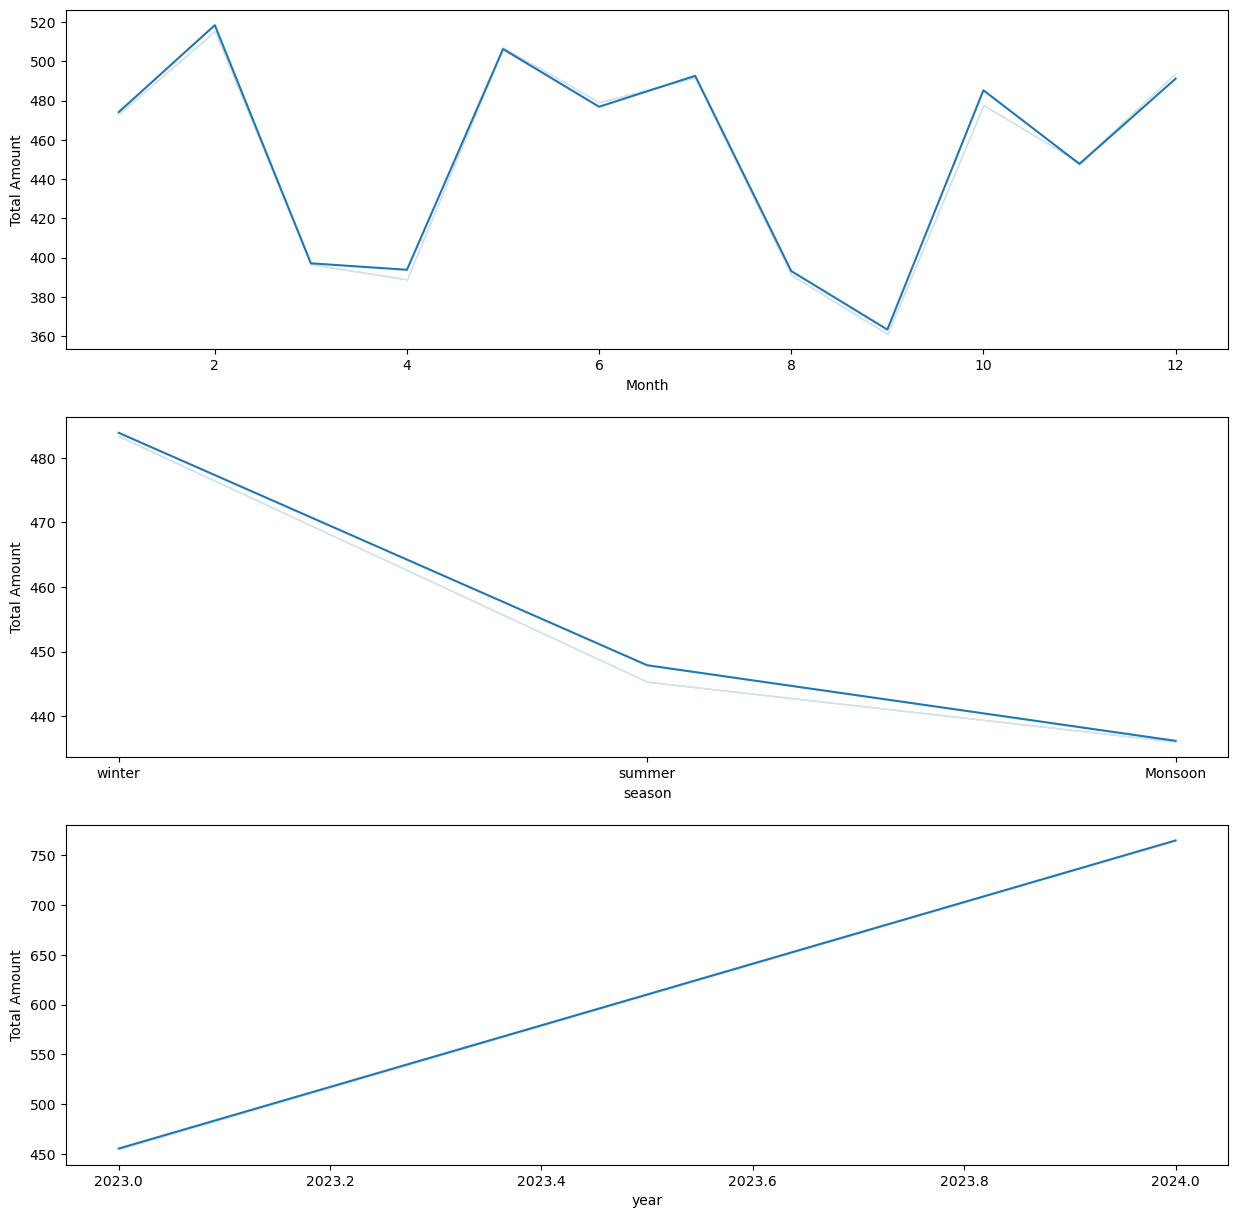

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.lineplot(data=df,x="Month",y="Total Amount",ci=False)

plt.subplot(3,1,2)
sns.lineplot(data=df,x="season",y="Total Amount",ci=False)

plt.subplot(3,1,3)
sns.lineplot(data=df,x="year",y="Total Amount",ci=False)


plt.show()

## Product Category Preferences
* Determine the most popular product categories by sales volume and revenue.
* Analyze customer demographics for each product category.

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\1375515514.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x="Product Category",y="Total Amount",ci=False)


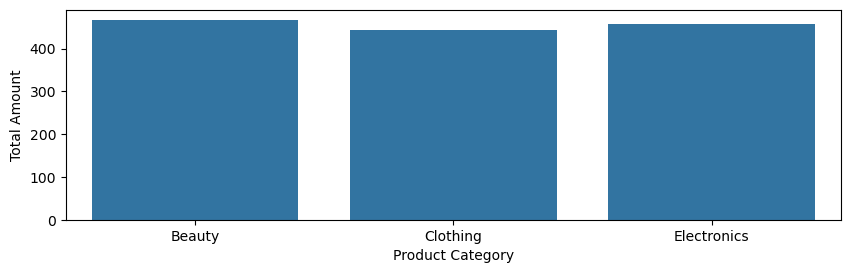

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\1375515514.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x="Product Category",y="Quantity",ci=False,hue="Gender")


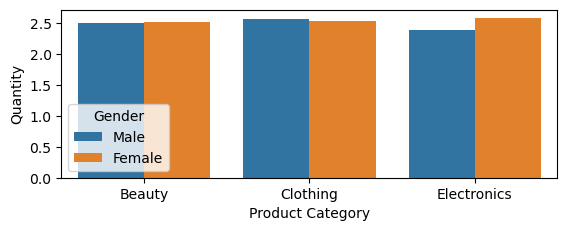

In [43]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.barplot(data=df,x="Product Category",y="Total Amount",ci=False)
plt.show()

plt.subplot(2,1,2)
sns.barplot(data=df,x="Product Category",y="Quantity",ci=False,hue="Gender")
plt.show()

## Customer Spending and Product Preferences
* Study correlations between age, total spending, and product choices.
* Identify high-value customer segments based on spending behavior.

In [44]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'year', 'season'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

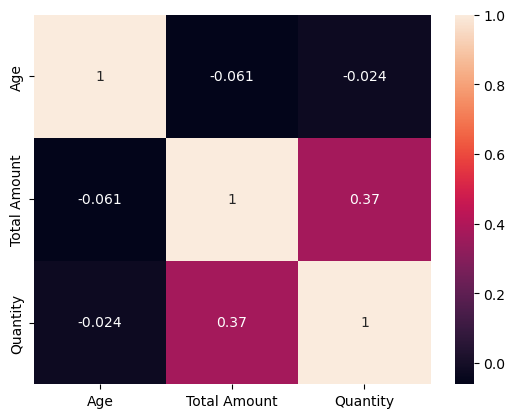

In [7]:
sns.heatmap(df[["Age","Total Amount","Quantity"]].corr(),annot=True)
plt.show

C:\Users\adity\AppData\Local\Temp\ipykernel_2604\2271310306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x=pd.cut(df["Total Amount"],bins=range(20,2200,400),labels=["20-420","421-820","821-1220","1221-1620","1621-2020"]),


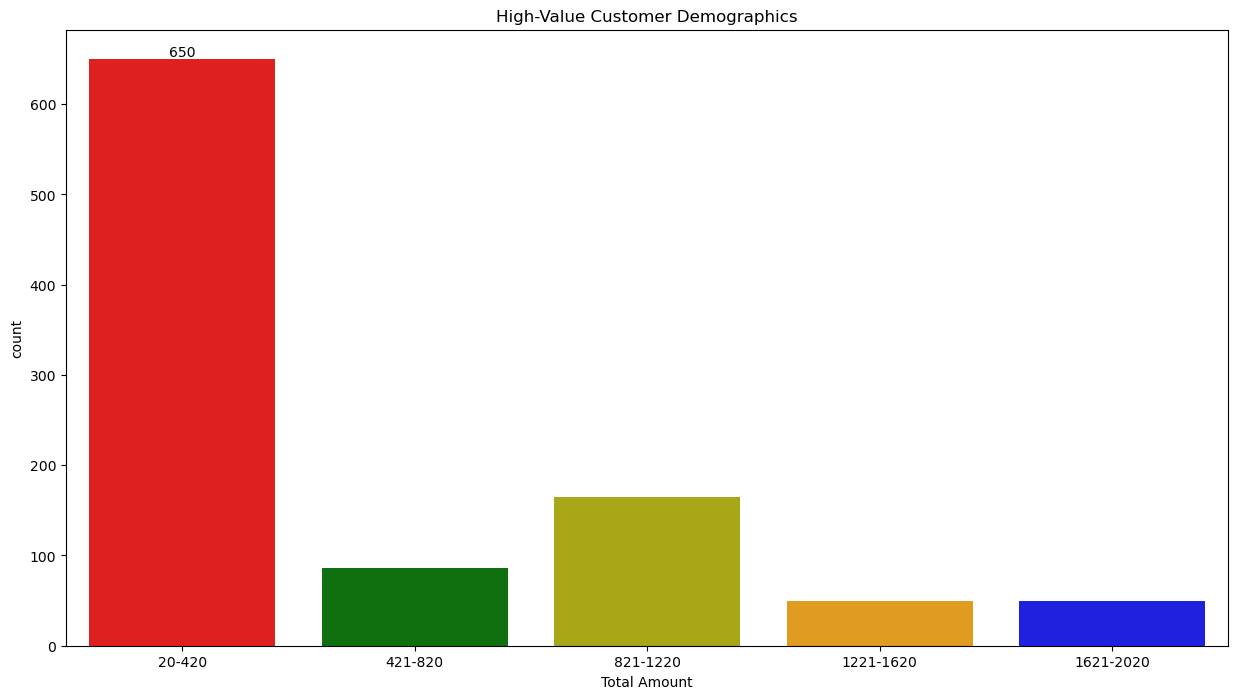

In [9]:

plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x=pd.cut(df["Total Amount"],bins=range(20,2200,400),labels=["20-420","421-820","821-1220","1221-1620","1621-2020"]),
                 palette=("r","g","y","orange","b"))
plt.bar_label(ax.containers[0])
plt.title('High-Value Customer Demographics')
plt.show()

## Seasonal Shopping Trends
* Compare purchasing behavior during different seasons.
* Identify changes in product preferences over time.

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\4005869451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='Total Amount', palette='coolwarm')


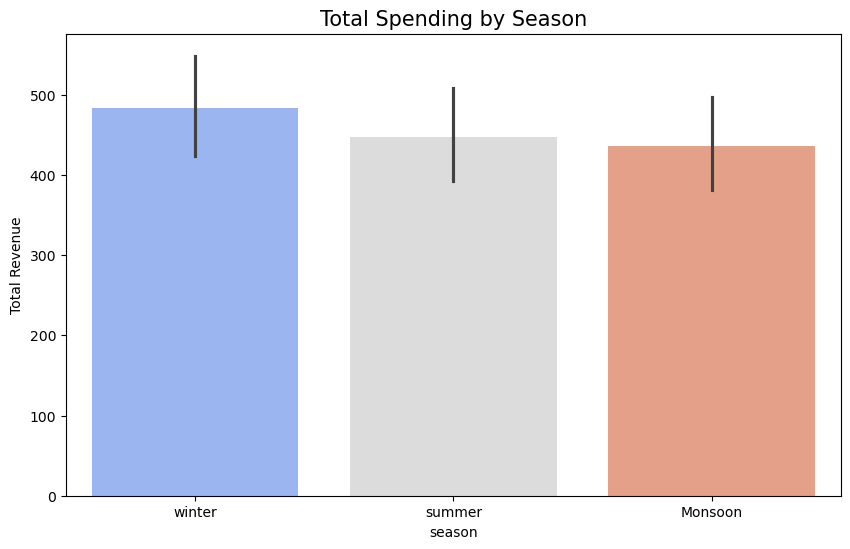

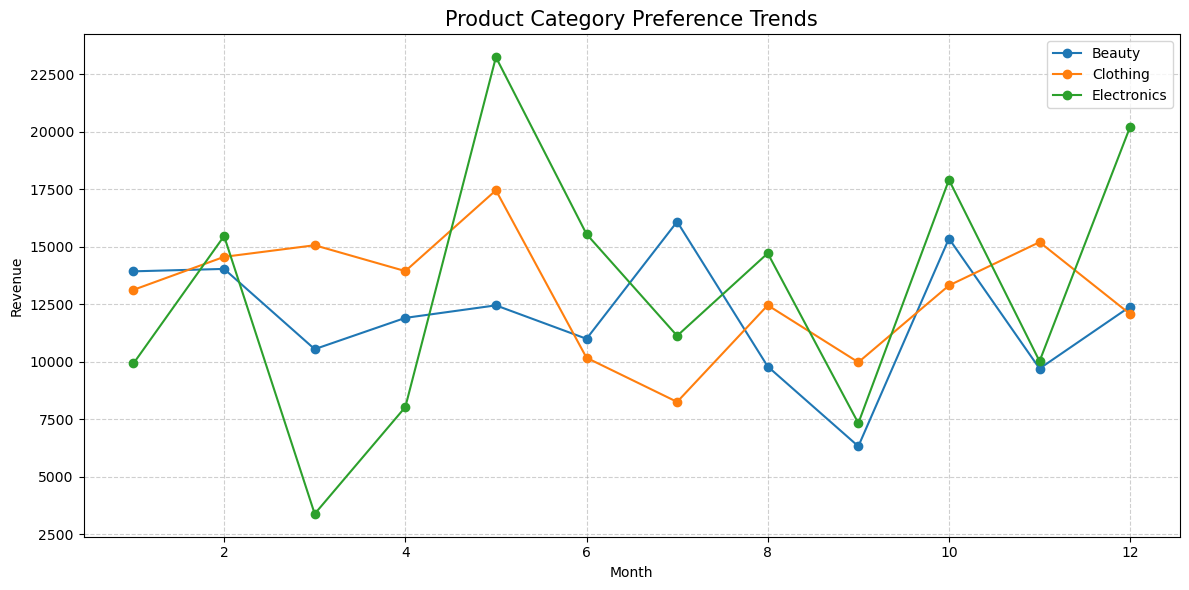

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='season', y='Total Amount', palette='coolwarm')
plt.title('Total Spending by Season', fontsize=15)
plt.ylabel('Total Revenue')
plt.show()

product= df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 6))
product.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Product Category Preference Trends', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Transaction-Based Purchasing Behavior
* Analyze the impact of quantity bought per transaction on total spending.
* Identify customer groups that buy in bulk vs. small quantities.


C:\Users\adity\AppData\Local\Temp\ipykernel_18320\3650055438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quantity', y='Total Amount', palette='Set3')


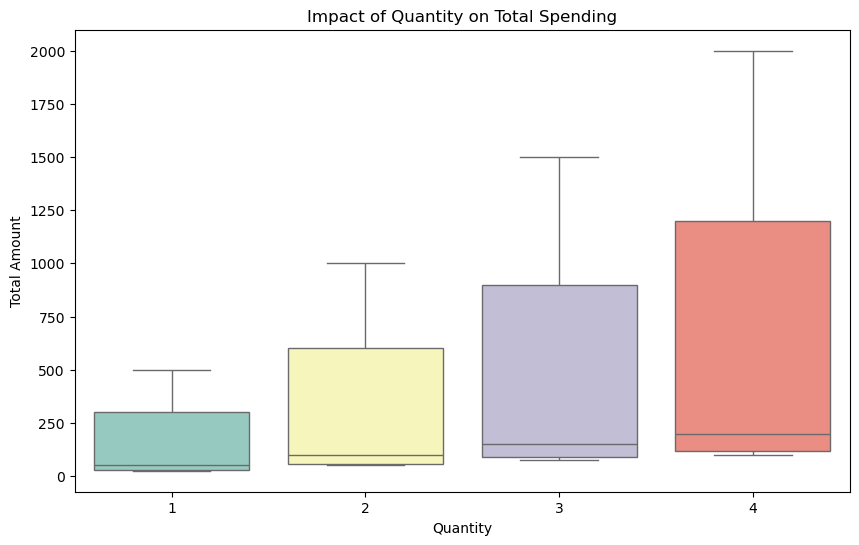

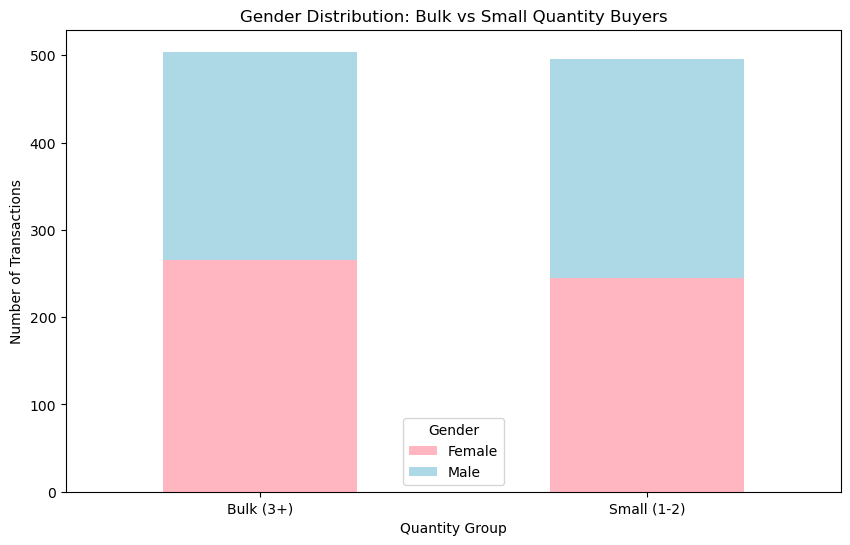

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\3650055438.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qty_group_age_dist = df.groupby(['Quantity Group', 'Age Group']).size().unstack()


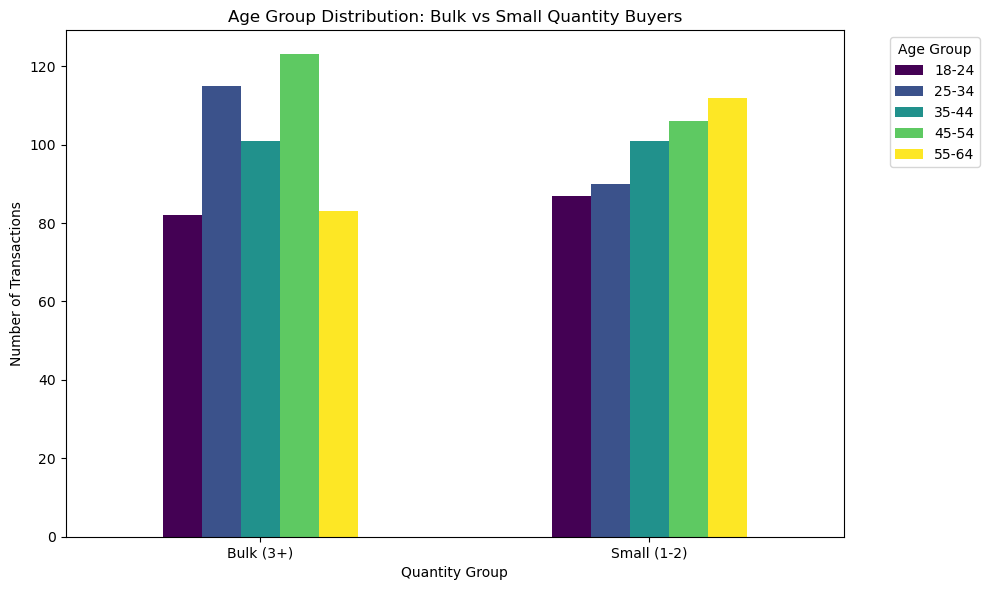

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Quantity', y='Total Amount', palette='Set3')
plt.title('Impact of Quantity on Total Spending')
plt.show()

df['Quantity Group'] = df['Quantity'].apply(lambda x: 'Bulk (3+)' if x >= 3 else 'Small (1-2)')
quantity_group_gender = df.groupby(['Quantity Group', 'Gender']).size().unstack()

plt.figure(figsize=(10, 6))
quantity_group_gender.plot(kind='bar', stacked=True, color=['lightpink', 'lightblue'], ax=plt.gca())
plt.title('Gender Distribution: Bulk vs Small Quantity Buyers')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


qty_group_age = df.groupby('Quantity Group')['Age'].mean()
qty_group_age_dist = df.groupby(['Quantity Group', 'Age Group']).size().unstack()

plt.figure(figsize=(10, 6))
qty_group_age_dist.plot(kind='bar', stacked=False, colormap='viridis', ax=plt.gca())
plt.title('Age Group Distribution: Bulk vs Small Quantity Buyers')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Product Price Distribution Insights
* Evaluate the price distribution within each product category.
* Identify price-sensitive and premium product segments.
 

C:\Users\adity\AppData\Local\Temp\ipykernel_18320\133279829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Price per Unit', palette='Set2')


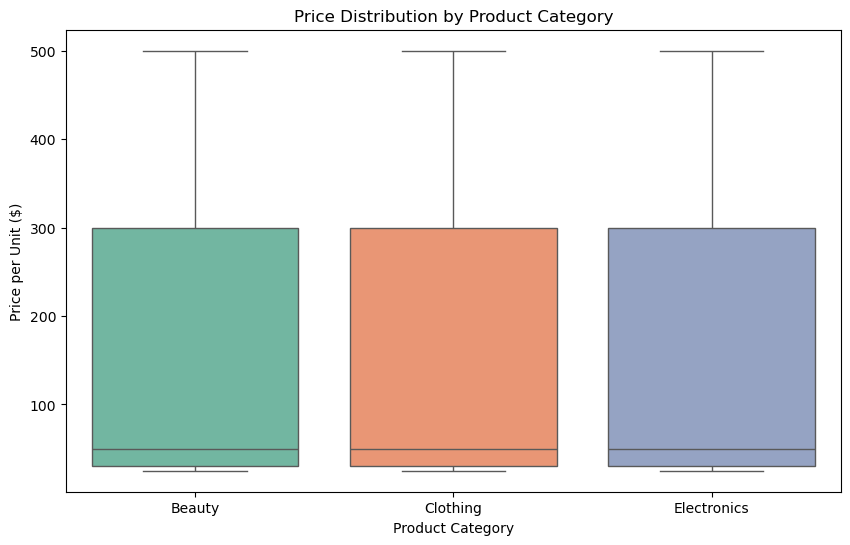

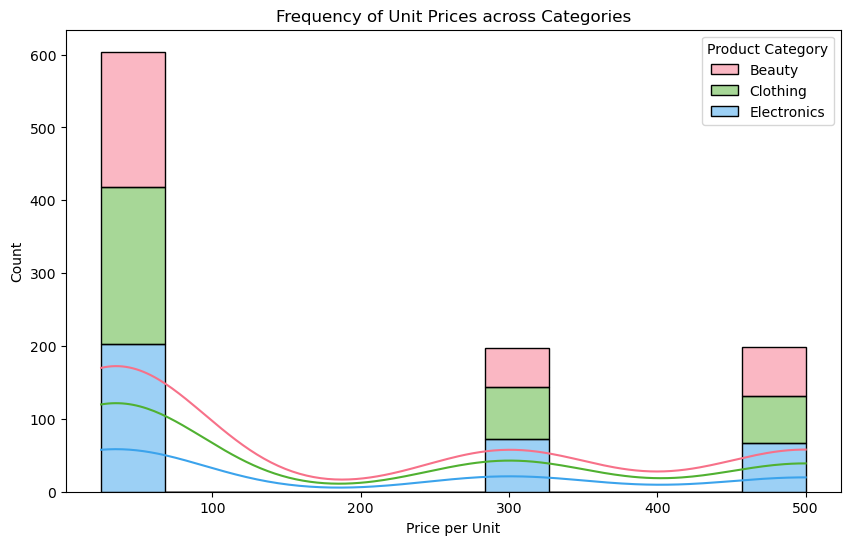

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product Category', y='Price per Unit', palette='Set2')
plt.title('Price Distribution by Product Category')
plt.ylabel('Price per Unit ($)')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price per Unit', hue='Product Category', kde=True ,multiple="stack",palette='husl')
plt.title('Frequency of Unit Prices across Categories')
plt.xlabel('Price per Unit')
plt.show()

#1.Explore the Data

1.Shape of data (rows, columns)

2.Column names and data types

3.Sample records

4.Basic statistics

#2.Clean the Data

1.Handle missing values (drop, fill, or replace)

2.Remove duplicates

3.Fix incorrect data types

4.Standardize text (case, spelling)

5.Handle outliers (if necessary)

#3.Summarize the Data

1.Aggregations (sum, mean, count)

2.Grouping (by category, region, time)

3.Frequency analysis

4.Correlation analysis

#4.Visualize Patterns & Trends

1.Bar charts → category comparison

2.Line charts → trends over time

3.Histograms → distribution

4.Boxplots → outliers

5.Heatmaps → correlations